# **Part 2.B Solutions Notebook** 

In [ ]:
from IPython.display import Image,display,HTML
import cv2
import scipy.stats as stats
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import linear_model

### Reading operations of the image

In [ ]:
image = cv2.imread('image9.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(400, 400)

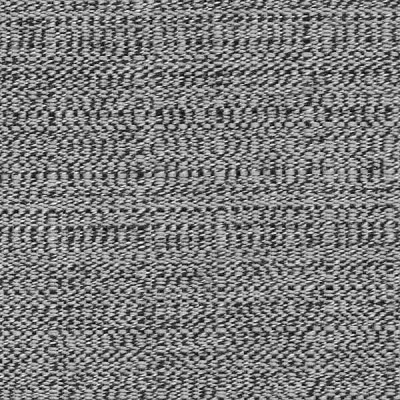

In [ ]:
cv2.imwrite('image9_gray.jpg', gray) 
Image(filename='image9_gray.jpg')

### Splitting image into 51x51 patches

In [ ]:
starting_x=0 #initialization of starting x coordinate
starting_y=0 #initialization of starting y coordinate
patch_number=49
number_of_predictors=(51*51)-1
y=np.arange(patch_number)
x=np.zeros((patch_number,number_of_predictors))
for i in range(patch_number): #repeating the process for total number of patches(last 43 pixels isn't considered at each dimension)
    gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)]   #selecting the patch
    y[i]=gray_patch[25,25]                                                   #selecting the central pixel
    x[i]=np.array(np.delete(gray_patch,1300))                                #finding predictors
    starting_x=starting_x+51 
    if starting_x==357:
        starting_y=starting_y+51
        starting_x=0
        if starting_y==357:
            break

In [ ]:
# starting_x=0 #initialization of starting x coordinate
# starting_y=0 #initialization of starting y coordinate
# patch_number=350*350
# number_of_predictors=(51*51)-1
# y=np.arange(patch_number)
# x=np.zeros((patch_number,number_of_predictors))
# for i in range(patch_number): #repeating the process for total number of patches(last 2 pixels isn't considered)
#     gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)] #selecting the patch
#     y[i]=gray_patch[25,25]
#     x[i]=np.array(np.delete(gray_patch,1300))
#     starting_x=starting_x+1
#     if starting_x==357:
#         starting_y=starting_y+1
#         starting_x=0
#         if starting_y==357:
#             break

### Building the linear regression model

In [ ]:
lm=linear_model.LinearRegression()
model =lm.fit(x,y)
predictions=lm.predict(x)
print(predictions)
print(y)

[205. 121. 148. 109. 178. 163. 103. 169. 112. 181. 138.  90. 171. 199.
 164. 229.  33. 114.  26.  80.  67.  98. 165. 105. 107.  52.  60.  28.
 157.  60.  65. 142. 150. 201.  83.  47.  91. 125. 138. 133. 201. 107.
  94.  53.  64. 135. 138. 163.  73.]
[205 121 148 109 178 163 103 169 112 181 138  90 171 199 164 229  33 114
  26  80  67  98 165 105 107  52  60  28 157  60  65 142 150 201  83  47
  91 125 138 133 201 107  94  53  64 135 138 163  73]


### Plotting the residuals

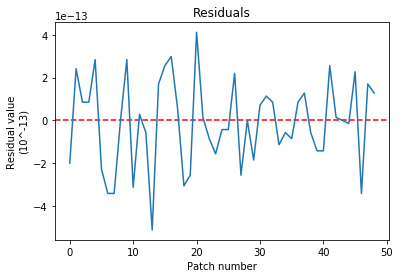

In [ ]:
residuals=y-predictions
plt.figure()
plt.title('Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.plot(residuals)
plt.xlabel('Patch number')
plt.ylabel('Residual value\n(10^-13)')
plt.show()

### Plotting the Q-Q plot of the residuals

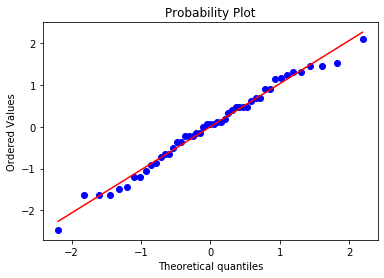

In [ ]:
residual_mean=np.mean(residuals)
residual_std=np.std(residuals)
residual_normalized=(residuals-residual_mean)/(residual_std)

stats.probplot(residual_normalized, dist="norm", plot=plt)
plt.show()

### X-bar chart of the residuals

0.7884287526207956


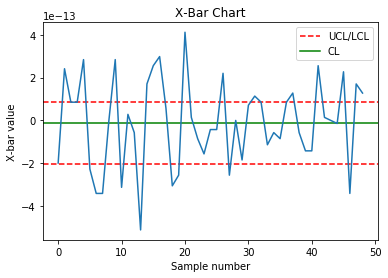

In [ ]:
#x-bar chart
n=15
m=10
c4=(4*(n-1))/(4*n-3)
A3=(3)/(c4*np.sqrt(n))
print(A3)
samples=np.zeros((m,n))
sample_means=np.zeros(m)
sample_std=np.zeros(m)

for i in range(m):
    rand_index=np.random.randint(49,size=n)
    samples[i]=residuals[rand_index]
    sample_means[i]=np.mean(samples[i])
    sample_std[i]=np.std(samples[i])

x_bar_bar=np.mean(sample_means)
s_bar=np.mean(sample_std)

upper_limit=x_bar_bar+A3*s_bar
lower_limit=x_bar_bar-A3*s_bar
central_line=residual_mean

plt.figure()
plt.title('X-Bar Chart')
plt.xlabel('Sample number')
plt.ylabel('X-bar value')
plt.axhline(upper_limit,color="r", linestyle='--', label='UCL/LCL')
plt.axhline(lower_limit,color="r", linestyle='--')
plt.axhline(central_line,color="g", label='CL')
plt.plot(residuals)
plt.legend()
plt.show()

0.43080357142857145


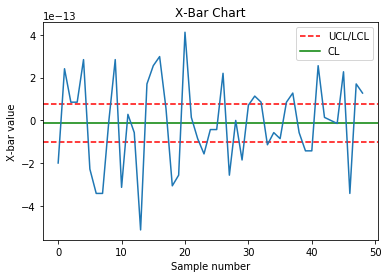

In [ ]:
#x-bar chart eski hali
n=49
c4=(4*(n-1))/(4*n-3)
A3=(3)/(c4*np.sqrt(n))
print(A3)
residual_mean=np.mean(residuals)
residual_std=np.std(residuals)
upper_limit=residual_mean+A3*residual_std
lower_limit=residual_mean-A3*residual_std
central_line=residual_mean

plt.figure()
plt.title('X-Bar Chart')
plt.xlabel('Sample number')
plt.ylabel('X-bar value')
plt.axhline(upper_limit,color="r", linestyle='--', label='UCL/LCL')
plt.axhline(lower_limit,color="r", linestyle='--')
plt.axhline(central_line,color="g", label='CL')
plt.plot(residuals)
plt.legend()
plt.show()

### Updating the image by setting the outlier values to 0 (black pixel)

In [ ]:
gray_updated=np.copy(gray)
outliers=np.where((residuals>upper_limit)|(residuals<lower_limit))
for i in outliers[0]: #replacing the outliers with 0
    gray_updated[25+(i%7)*51,25+int(i/7)*51]=0
    
cv2.imwrite('image9_gray_updated.jpg', gray) 
Image(filename='image9_gray_updated.jpg')


(array([ 25,  25,  25,  76,  76,  76,  76,  76, 127, 127, 127, 127, 127,
        178, 178, 178, 178, 229, 229, 229, 229, 229, 280, 280, 280, 280,
        331, 331, 331, 331, 331, 331, 331], dtype=int64),
 array([ 76, 178, 280,  25, 127, 229, 280, 331,  25,  76, 229, 280, 331,
         76, 127, 229, 331,  25,  76, 229, 280, 331,  25,  76, 178, 229,
         25,  76, 127, 178, 229, 280, 331], dtype=int64))

In [ ]:
diff=gray_updated-gray
a=np.where(diff!=0)
a[0].shape
# plt.plot(diff[a[0]])
# plt.show()

(33,)

In [ ]:
int(15/7)

2

In [ ]:
predicted=(lm.coef_)*(x)
print(np.sum(predicted)+lm.intercept_)
print(y[3])

109.00000000000004
109


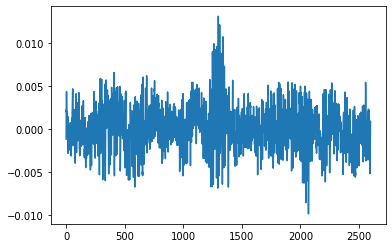

In [ ]:
plt.plot(predicted-)

In [ ]:
gray[25+153,25]

109

> **NOTE:** The source code is available at [here.](https://github.com/BU-IE-582/fall19-akinelden/blob/master/Project_Part2/Part2_B.ipynb)